Libs

In [ ]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, recall_score
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoConfig, AutoTokenizer, AutoModel

# A. CLASSIFICATON APPROACH

a- loading ParsBERT as a pre-trained model

In [ ]:
config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

b- load and tokenize the data

In [ ]:
train_df = pd.read_csv("Poem Meter Dataset/train_samples.csv")

In [ ]:
unique_classes = train_df["metre"].nunique()
print(f"Number of unique classes: {unique_classes}")

Number of unique classes: 48


In [ ]:
train_df["metre"].value_counts()

,count
metre,
مفاعیلن مفاعیلن فعولن,149803
فعولن فعولن فعولن فعل,135237
فاعلاتن فاعلاتن فاعلن,116341
فعلاتن مفاعلن فعلن,73436
فاعلاتن فاعلاتن فاعلاتن فاعلن,35149
مفاعلن فعلاتن مفاعلن فعلن,33924
مفعول فاعلات مفاعیل فاعلن,27574
مفعول مفاعیل مفاعیل فعل,25714
مفعول مفاعلن فعولن,25262


In [ ]:
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(100000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [ ]:
train_texts = train_df["poem_text"].tolist()
train_labels = train_df["metre"].astype('category').cat.codes.values

In [ ]:
train_texts = ["[CLS] " + text for text in train_texts]

In [ ]:
train_texts

['[CLS] شرح بسیاری بگفت از کائنات',
 '[CLS] چه جای رفتن باغ است و گشتن بستان',
 '[CLS] پای خود آرم برون وبر پرم',
 '[CLS] چو گوهر برآمود زنگی به تاج',
 '[CLS] هست جاری دجله\u200cای همچون شکر',
 '[CLS] چه آب جویم از جوی خشک یونانی؟',
 '[CLS] ای خیال ار شبی از رهگذرم برخیزی',
 '[CLS] دعای پیر رابات کار خواهد کرد',
 '[CLS] بترس سخت ز سختی چو کاری آسان شد',
 '[CLS] که به نزد من این دقل بعیان',
 '[CLS] چونک پاهای آهنین دارم',
 '[CLS] در پیش تو استاده بر این جامهٔ پشمین',
 '[CLS] در صدای کوه افتد بانگ من چون بشنوی',
 '[CLS] به پرخاش او پی چه خواهی فشرد',
 '[CLS] ولی فرهاد را جانی نو آمد',
 '[CLS] آفت زدهٔ حوادثی را',
 '[CLS] نگهدارش تو این گفتار ما را',
 '[CLS] شود واصل نبیند جز یکی او',
 '[CLS] کسی بشناختست اندر عیانی',
 '[CLS] ز بی\u200cنشانی اوصاف او نشان داریم',
 '[CLS] آنکه هر حرف را دلش بُد ظرف',
 '[CLS] هستی تو به پیروزی چون موسیِ عِمران',
 '[CLS] گاه در خاک خرابات به جان باز نهاد',
 '[CLS] تا دهان خاکیان را زان عسل آلوده\u200cای',
 '[CLS] هذیان پرسمت نه از وی به',
 '[CLS] خلق را از ظ

In [ ]:
inputs = tokenizer(train_texts, return_tensors="pt", padding=True, truncation=True, max_length=12)
labels = torch.tensor(train_labels, dtype=torch.long)

In [ ]:
inputs = {k: v.to(device) for k, v in inputs.items()}
labels = labels.to(device)

In [ ]:
train_dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_dataloader = DataLoader(train_dataset, batch_size=512, shuffle=True)

In [ ]:
class_counts = train_df['metre'].value_counts().sort_index()
class_weights = 1.0 / torch.tensor(class_counts.values, dtype=torch.float)
class_weights = class_weights.to(device)

c - Adding classification layer

In [ ]:
hidden_size = model.config.hidden_size
classifier = nn.Linear(hidden_size, unique_classes).to(device)

d - load and tokenize validation set

In [ ]:
validation_df = pd.read_csv("Poem Meter Dataset/validation_samples.csv")

In [ ]:
validation_texts = validation_df["poem_text"].tolist()
validation_labels = validation_df["metre"].astype('category').cat.codes.values

In [ ]:
validation_texts = ["[CLS] " + text for text in validation_texts]

In [ ]:
validation_inputs = tokenizer(validation_texts, return_tensors="pt", padding=True, truncation=True, max_length=12)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)

In [ ]:
validation_inputs = {k: v.to(device) for k, v in validation_inputs.items()}
validation_labels = validation_labels.to(device)

In [ ]:
validation_dataset = TensorDataset(validation_inputs['input_ids'], validation_inputs['attention_mask'], validation_labels)
validation_dataloader = DataLoader(validation_dataset, batch_size=512)

e - training the network

In [ ]:
for param in model.parameters():
    param.requires_grad = True

In [53]:
classifier_optimizer = optim.Adam(list(classifier.parameters()), lr=1e-4, weight_decay=0.01)
bert_model_optimizer = optim.Adam(list(model.parameters()), lr=3e-5, weight_decay=0.01)
criterion = nn.CrossEntropyLoss(weight=class_weights)

num_epochs = 15
validation_interval = 700

best_val_loss = float('inf')
patience = 5
epochs_without_improvement = 0

for epoch in range(num_epochs):
    model.train()
    classifier.train()
    total_loss = 0
    for i, batch in enumerate(train_dataloader):
        input_ids, attention_mask, batch_labels = batch

        classifier_optimizer.zero_grad()
        bert_model_optimizer.zero_grad()

        try:
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            cls_token_output = outputs.last_hidden_state[:, 0, :]
            logits = classifier(cls_token_output)

            loss = criterion(logits, batch_labels)
            total_loss += loss.item()
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_dataloader)}, Loss: {loss.item()}")

            loss.backward()

            classifier_optimizer.step()
            bert_model_optimizer.step()

        except RuntimeError as e:
            print(f"RuntimeError occurred: {e}")
            print("Batch input_ids: ", input_ids)
            print("Batch labels: ", batch_labels)
            raise

        if i % validation_interval == 0:
            model.eval()
            classifier.eval()
            with torch.no_grad():
                total_val_loss = 0
                correct = 0
                for i, batch in enumerate(validation_dataloader):
                    input_ids, attention_mask, batch_labels = batch

                    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                    cls_token_output = outputs.last_hidden_state[:, 0, :]
                    logits = classifier(cls_token_output)

                    loss = criterion(logits, batch_labels)
                    total_val_loss += loss.item()

                    _, predicted = torch.max(logits, dim=1)
                    correct += (predicted == batch_labels).sum().item()

                accuracy = correct / len(validation_dataloader.dataset)
                val_loss = total_val_loss / len(validation_dataloader)
                print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    epochs_without_improvement = 0
                    torch.save(model.state_dict(), 'best_bert_model.pth')
                    torch.save(classifier.state_dict(), 'best_classifier_model.pth')
                else:
                    epochs_without_improvement += 1
                    if epochs_without_improvement >= patience:
                        print(f"Early stopping at epoch {epoch+1} due to no improvement on validation set")
                        break

Streaming output truncated to the last 5000 lines.
Epoch 11/15, Batch 108/1464, Loss: 0.46094101667404175
Epoch 11/15, Batch 109/1464, Loss: 0.4011922776699066
Epoch 11/15, Batch 110/1464, Loss: 0.5265625715255737
Epoch 11/15, Batch 111/1464, Loss: 0.32834938168525696
Epoch 11/15, Batch 112/1464, Loss: 0.45639467239379883
Epoch 11/15, Batch 113/1464, Loss: 0.5835810303688049
Epoch 11/15, Batch 114/1464, Loss: 0.2904406189918518
Epoch 11/15, Batch 115/1464, Loss: 0.3756761848926544
Epoch 11/15, Batch 116/1464, Loss: 0.2773752808570862
Epoch 11/15, Batch 117/1464, Loss: 0.26419711112976074
Epoch 11/15, Batch 118/1464, Loss: 0.3023906648159027
Epoch 11/15, Batch 119/1464, Loss: 0.3616560101509094
Epoch 11/15, Batch 120/1464, Loss: 0.38833948969841003
Epoch 11/15, Batch 121/1464, Loss: 0.46678125858306885
Epoch 11/15, Batch 122/1464, Loss: 0.39589923620224
Epoch 11/15, Batch 123/1464, Loss: 0.4280272126197815
Epoch 11/15, Batch 124/1464, Loss: 0.33198490738868713
Epoch 11/15, Batch 125/146

f - printing some outputs

In [54]:
model.eval()
classifier.eval()
metre_categories = validation_df["metre"].astype('category').cat.categories

all_predictions = []
all_labels = []
samples = []
with torch.no_grad():
    for batch in validation_dataloader:
        input_ids, attention_mask, batch_labels = [x.to(device) for x in batch]

        validation_outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        validation_cls_token_output = validation_outputs.last_hidden_state[:, 0, :]
        validation_logits = classifier(validation_cls_token_output)

        predictions = torch.argmax(validation_logits, dim=1)  # like softmax
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

        # Get 20 samples
        if len(samples) < 20:
            for i in range(len(input_ids)):
                if len(samples) < 20:
                    sample = {
                        'input': input_ids[i].cpu().numpy(),
                        'attention_mask': attention_mask[i].cpu().numpy(),
                        'prediction': predictions[i].cpu().numpy(),
                        'label': batch_labels[i].cpu().numpy()
                    }
                    samples.append(sample)

        if len(samples) == 20:
            break

# Print the samples
for i, sample in enumerate(samples):
    print(f"Sample {i+1}:")
    print(f"Input: {tokenizer.decode(sample['input'], skip_special_tokens=True)}")
    print(f"Attention Mask: {sample['attention_mask']}")
    print(f"Prediction: {metre_categories[int(sample['prediction'])]}")
    print(f"Label: {metre_categories[int(sample['label'])]}")
    print("------------------------")

Sample 1:
Input: که من با چو و با تو را نمیدانم
Attention Mask: [1 1 1 1 1 1 1 1 1 1 1 1]
Prediction: مفاعیلن مفاعیلن مفاعیلن مفاعیلن
Label: مفاعیلن مفاعیلن مفاعیلن مفاعیلن
------------------------
Sample 2:
Input: نیست ان جز حیله نفس لیم
Attention Mask: [1 1 1 1 1 1 1 1 1 0 0 0]
Prediction: فعلاتن مفاعلن فعلن
Label: فاعلاتن فاعلاتن فاعلن
------------------------
Sample 3:
Input: پراپرند زطمع بازو ، جغدکان
Attention Mask: [1 1 1 1 1 1 1 1 1 1 1 1]
Prediction: مفعول فاعلات مفاعیل فاعلن
Label: مفاعلن فعلاتن مفاعلن فعلن
------------------------
Sample 4:
Input: ولی شد چار دای از چار یارش
Attention Mask: [1 1 1 1 1 1 1 1 1 1 0 0]
Prediction: مفاعیلن مفاعیلن فعولن
Label: مفاعیلن مفاعیلن فعولن
------------------------
Sample 5:
Input: همی جفتی طلب چون چشم اخر!
Attention Mask: [1 1 1 1 1 1 1 1 1 1 0 0]
Prediction: مفاعیلن مفاعیلن فعولن
Label: مفاعیلن مفاعیلن فعولن
------------------------
Sample 6:
Input: دستی به کام دل ز سپهر دغا که
Attention Mask: [1 1 1 1 1 1 1 1 1 1 1 1]
Prediction: مفعول

g - getting the results for validation set

In [55]:
model.eval()
classifier.eval()

all_predictions = []
all_labels = []
with torch.no_grad():
    for batch in validation_dataloader:
        input_ids, attention_mask, batch_labels = [x.to(device) for x in batch]

        validation_outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        validation_cls_token_output = validation_outputs.last_hidden_state[:, 0, :]
        validation_logits = classifier(validation_cls_token_output)

        predictions = torch.argmax(validation_logits, dim=1)  # like softmax
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

g - report on validation set

In [56]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='macro')
recall = recall_score(all_labels, all_predictions, average='macro')
precision = precision_score(all_labels, all_predictions, average='macro')

print('---------- Report on validation set ----------')
print(f'accurcy : {accuracy}')
print(f'f1 macro score: {f1}')
print(f'recall: {recall}')
print(f'precision: {precision}')

---------- Report on validation set ----------
accurcy : 0.8171112939240804
f1 macro score: 0.7310837816017143
recall: 0.7781261284731812
precision: 0.7050044231722697


----------sorted classes (correctly classified / total number of each class) -------
Class-wise Correct Classification Ratios:
Class 'فاعلات فع فاعلات فع': Correctly detected 12 out of 12 samples, Ratio: 1.00
Class 'فاعلاتن فاعلاتن فاعلاتن': Correctly detected 96 out of 96 samples, Ratio: 1.00
Class 'فاعلن مفاعیلن فاعلن مفاعیلن': Correctly detected 112 out of 112 samples, Ratio: 1.00
Class 'فعلاتن مفاعلن فعلاتن': Correctly detected 18 out of 18 samples, Ratio: 1.00
Class 'فعلاتن مفاعلن فعلاتن مفاعلن': Correctly detected 240 out of 240 samples, Ratio: 1.00
Class 'فعولن فعولن مفاعلن': Correctly detected 18 out of 18 samples, Ratio: 1.00
Class 'فعولن مفاعلن فعولن مفاعلن': Correctly detected 24 out of 24 samples, Ratio: 1.00
Class 'متفاعلن متفاعلن متفاعلن متفاعلن': Correctly detected 66 out of 66 samples, Ratio: 1.00
Class 'مستفعلن فعلن مستفعلن فعلن': Correctly detected 160 out of 160 samples, Ratio: 1.00
Class 'مستفعلن مستفعلن مستفعلن': Correctly detected 18 out of 18 samples, Ratio: 1.00

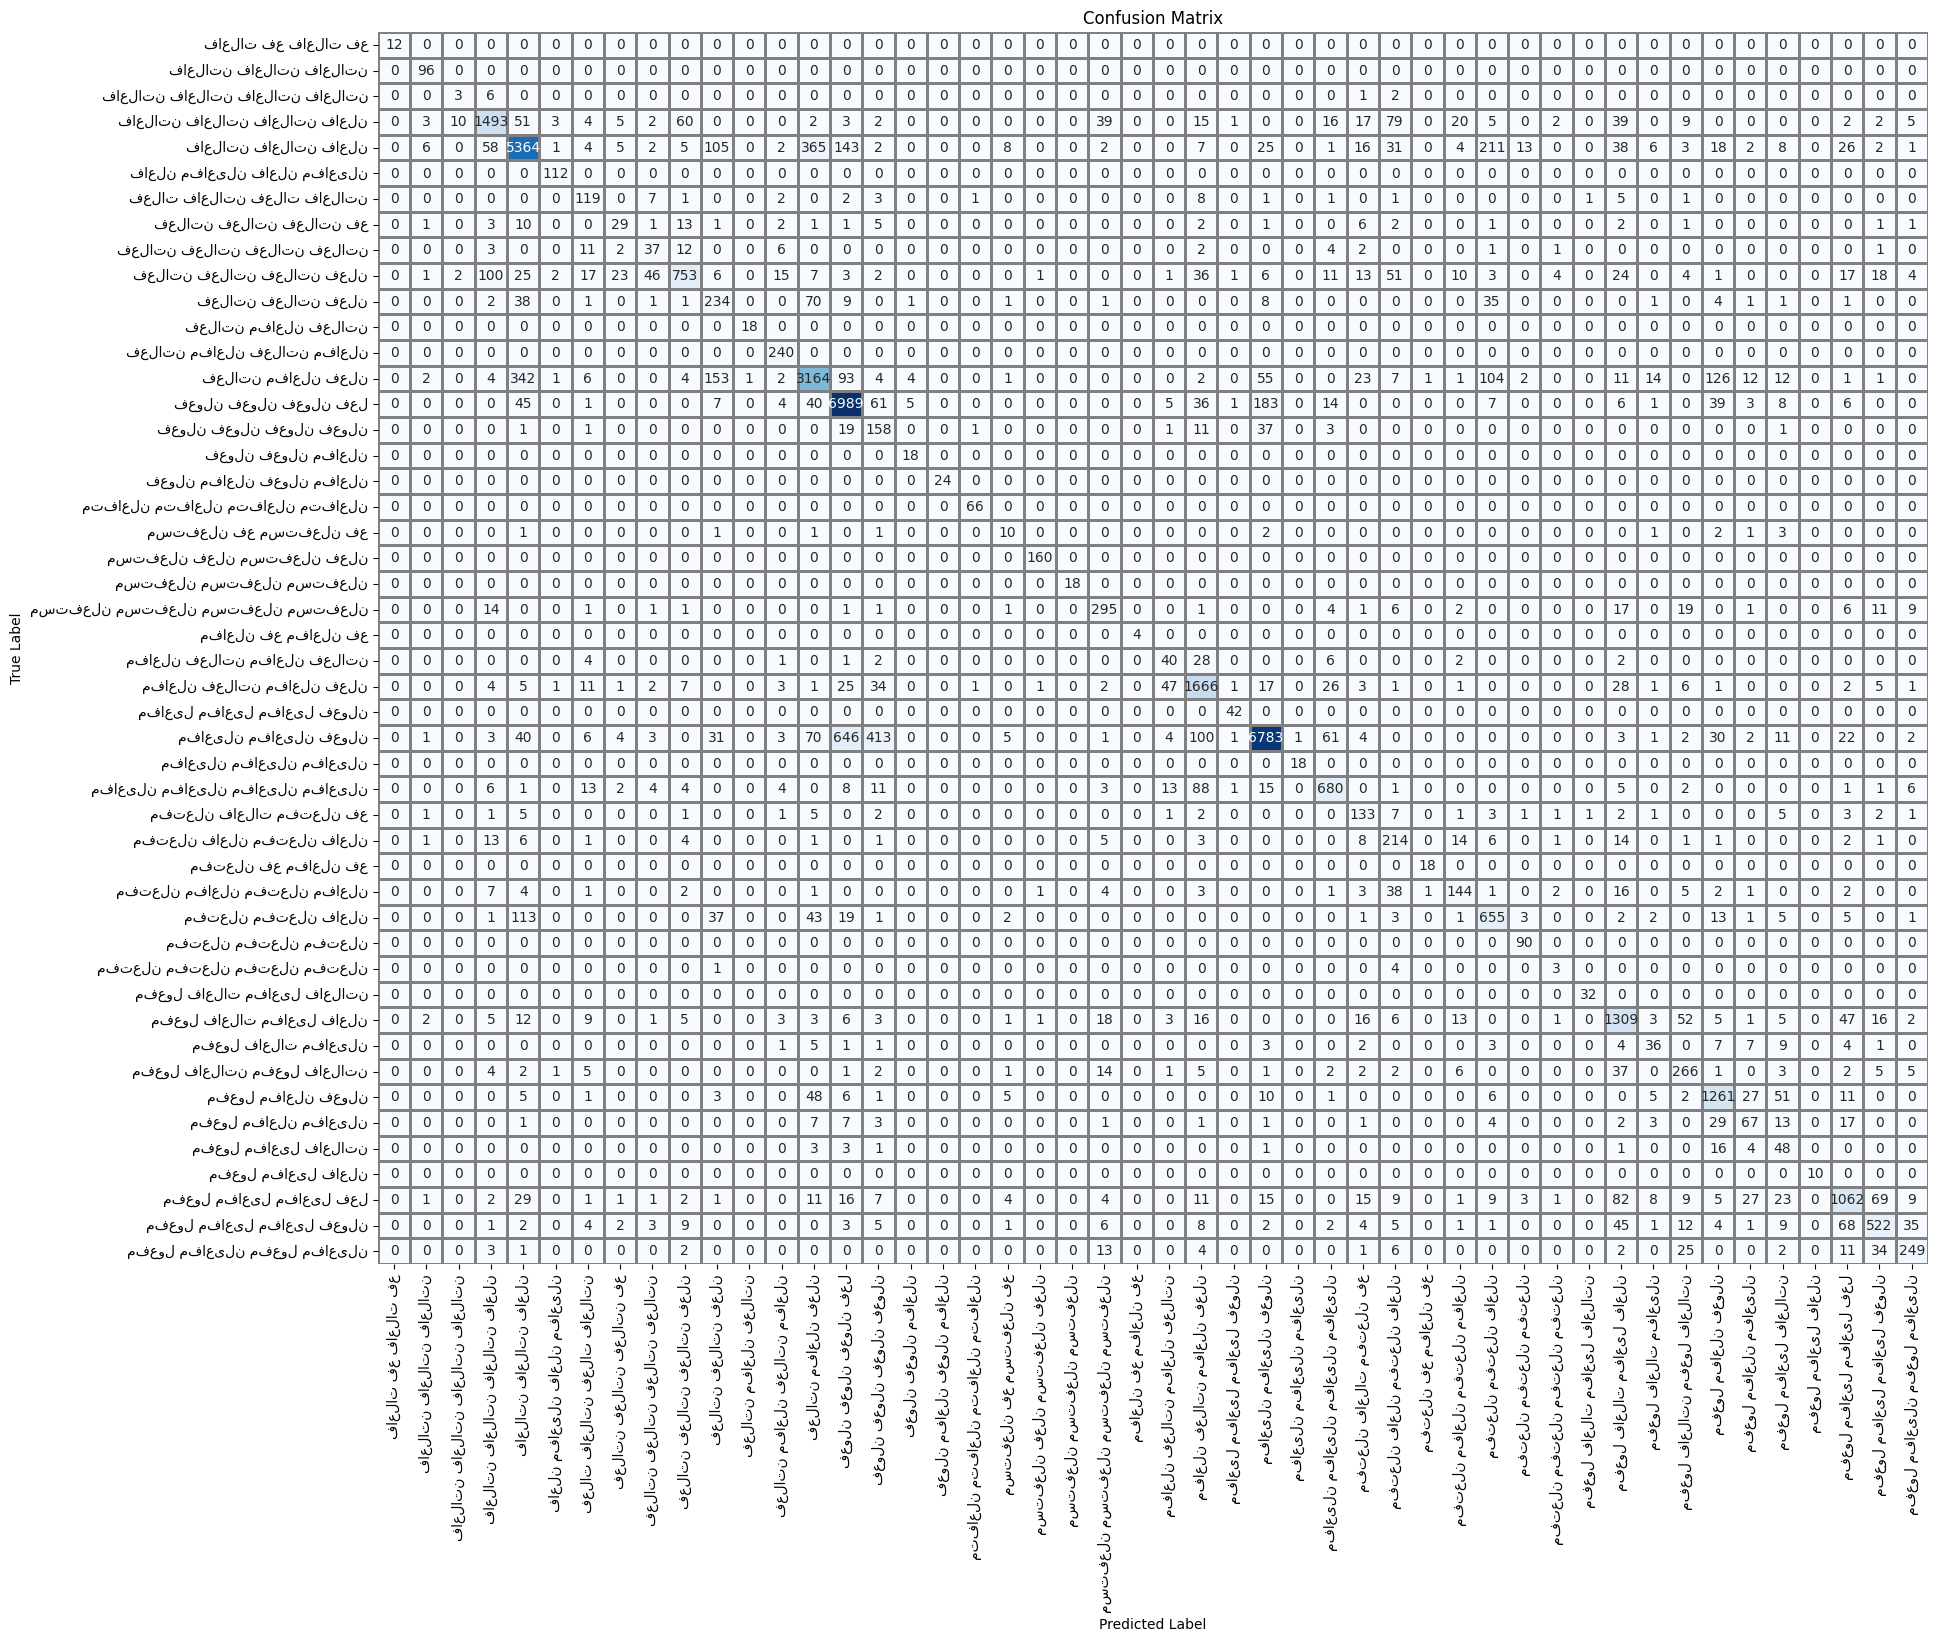

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(f'----------sorted classes (correctly classified / total number of each class) -------')
conf_matrix = confusion_matrix(all_labels, all_predictions)
correct_per_class = conf_matrix.diagonal()

class_ratios = []
for idx, count in enumerate(correct_per_class):
    class_label = metre_categories[idx]
    total_samples = conf_matrix[idx].sum()
    ratio = count / total_samples if total_samples > 0 else 0
    class_ratios.append((class_label, count, total_samples, ratio))

class_ratios = sorted(class_ratios, key=lambda x: x[3], reverse=True)

print("Class-wise Correct Classification Ratios:")
for class_label, count, total_samples, ratio in class_ratios:
    print(f"Class '{class_label}': Correctly detected {count} out of {total_samples} samples, Ratio: {ratio:.2f}")

print('------------confusion matrix--------------')
plt.figure(figsize=(20, 16))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=metre_categories, yticklabels=metre_categories, linewidths=1, linecolor='gray', cbar=False, annot_kws={'size': 10})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

h - get and save the results on test data

In [58]:
test_df = pd.read_csv("Poem Meter Dataset/test_samples.csv")
test_texts = test_df["poem_text"].tolist()

# Adding [CLS] token at the beginning of the inputs
test_texts = ["[CLS] " + text for text in test_texts]

test_inputs = tokenizer(test_texts, return_tensors="pt", padding=True, truncation=True, max_length=32)

test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'])
test_dataloader = DataLoader(test_dataset, batch_size=512)

In [59]:
model.eval()
classifier.eval()

all_test_predictions = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask = [x.to(device) for x in batch]

        test_outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        test_cls_token_output = test_outputs.last_hidden_state[:, 0, :]
        test_logits = classifier(test_cls_token_output)

        test_predictions = torch.argmax(test_logits, dim=1)
        all_test_predictions.extend(test_predictions.cpu().numpy())

test_text_labels = [metre_categories[code] for code in all_test_predictions]
test_df["predicted_metre"] = test_text_labels
test_df.to_csv("Poem Meter Dataset/test_samples_with_predictions.csv", index=False)